In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 0, 0, 0], [1, 0, 1, 1], [1, 0, 1, 0], [1, 0, 0, 1], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 1, 1], [1, 1, 0, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.48197 stdev: 0.08766
Best fitness: 0.68769 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.186
Mean genetic distance 2.945, standard deviation 0.484
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.307 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53658 stdev: 0.08050
Best fitness: 0.68769 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.224
Mean genetic distance 3.042, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.723 sec (5.515 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56309 stdev: 0.07945
Best fitness: 0.71305 - size: (3, 14) - species 22 - id 496
Average adjusted fitness: 0.187
Mean genetic distance 3.077, standard deviation 0.491
Population of 200 members in 35 species
Total extinction

Population's average fitness: 0.62525 stdev: 0.08923
Best fitness: 0.76005 - size: (5, 20) - species 9 - id 2078
Average adjusted fitness: 0.328
Mean genetic distance 3.267, standard deviation 0.504
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 19.325 sec (18.612 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62222 stdev: 0.08890
Best fitness: 0.76933 - size: (4, 17) - species 38 - id 3430
Average adjusted fitness: 0.238
Mean genetic distance 3.282, standard deviation 0.495
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.389 sec (19.064 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62281 stdev: 0.09246
Best fitness: 0.76933 - size: (4, 17) - species 38 - id 3430
Average adjusted fitness: 0.236
Mean genetic distance 3.263, standard deviation 0.500
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 27.259 sec (20.086 average)

 *

Population's average fitness: 0.62280 stdev: 0.10195
Best fitness: 0.80148 - size: (6, 21) - species 38 - id 5202
Average adjusted fitness: 0.234
Mean genetic distance 3.153, standard deviation 0.531
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 22.118 sec (25.150 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61843 stdev: 0.10378
Best fitness: 0.80148 - size: (6, 21) - species 38 - id 5202
Average adjusted fitness: 0.233
Mean genetic distance 3.128, standard deviation 0.539
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 22.531 sec (24.843 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61564 stdev: 0.10592
Best fitness: 0.80148 - size: (6, 21) - species 38 - id 5202
Average adjusted fitness: 0.235
Mean genetic distance 3.106, standard deviation 0.537
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 22.947 sec (24.688 average)

 

Population's average fitness: 0.60864 stdev: 0.11058
Best fitness: 0.80705 - size: (9, 29) - species 9 - id 8881
Average adjusted fitness: 0.241
Mean genetic distance 3.063, standard deviation 0.564
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 24.206 sec (24.928 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.60537 stdev: 0.11164
Best fitness: 0.80705 - size: (9, 29) - species 9 - id 8881
Average adjusted fitness: 0.250
Mean genetic distance 3.072, standard deviation 0.547
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 24.635 sec (24.923 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.60076 stdev: 0.11710
Best fitness: 0.80705 - size: (9, 29) - species 9 - id 8881
Average adjusted fitness: 0.245
Mean genetic distance 3.031, standard deviation 0.557
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 24.708 sec (24.840 average)

 ***

Population's average fitness: 0.60750 stdev: 0.12062
Best fitness: 0.81756 - size: (8, 28) - species 62 - id 13232
Average adjusted fitness: 0.237
Mean genetic distance 3.151, standard deviation 0.551
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 28.232 sec (26.808 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.61677 stdev: 0.11585
Best fitness: 0.81756 - size: (8, 28) - species 62 - id 13232
Average adjusted fitness: 0.249
Mean genetic distance 3.159, standard deviation 0.551
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 30.280 sec (27.273 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.60697 stdev: 0.12524
Best fitness: 0.81756 - size: (8, 28) - species 62 - id 13232
Average adjusted fitness: 0.228
Mean genetic distance 3.150, standard deviation 0.564
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 31.112 sec (27.739 average)

Population's average fitness: 0.60650 stdev: 0.12616
Best fitness: 0.83302 - size: (8, 29) - species 62 - id 18778
Average adjusted fitness: 0.213
Mean genetic distance 3.209, standard deviation 0.613
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 31.053 sec (31.155 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.60932 stdev: 0.12126
Best fitness: 0.83302 - size: (8, 29) - species 62 - id 18778
Average adjusted fitness: 0.210
Mean genetic distance 3.184, standard deviation 0.652
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 30.826 sec (31.227 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.61881 stdev: 0.12029
Best fitness: 0.83302 - size: (8, 29) - species 62 - id 18778
Average adjusted fitness: 0.245
Mean genetic distance 3.194, standard deviation 0.653
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 30.911 sec (31.233 averag

Population's average fitness: 0.61923 stdev: 0.13018
Best fitness: 0.84477 - size: (11, 35) - species 62 - id 22073
Average adjusted fitness: 0.280
Mean genetic distance 3.190, standard deviation 0.643
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 40.538 sec (33.798 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.64007 stdev: 0.12021
Best fitness: 0.84477 - size: (11, 35) - species 62 - id 22073
Average adjusted fitness: 0.314
Mean genetic distance 3.208, standard deviation 0.630
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 37.589 sec (34.297 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.62569 stdev: 0.12375
Best fitness: 0.84477 - size: (11, 35) - species 62 - id 22073
Average adjusted fitness: 0.271
Mean genetic distance 3.213, standard deviation 0.606
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 36.845 sec (34.741 ave

Population's average fitness: 0.61844 stdev: 0.12467
Best fitness: 0.84910 - size: (12, 38) - species 62 - id 24688
Average adjusted fitness: 0.222
Mean genetic distance 3.077, standard deviation 0.571
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 37.435 sec (38.624 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.62394 stdev: 0.12816
Best fitness: 0.84910 - size: (12, 38) - species 62 - id 24688
Average adjusted fitness: 0.319
Mean genetic distance 3.078, standard deviation 0.561
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 37.616 sec (38.138 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.63221 stdev: 0.12355
Best fitness: 0.84910 - size: (12, 38) - species 62 - id 24688
Average adjusted fitness: 0.271
Mean genetic distance 3.078, standard deviation 0.543
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 38.851 sec (38.154 ave

Population's average fitness: 0.66008 stdev: 0.11232
Best fitness: 0.85714 - size: (13, 39) - species 62 - id 31424
Average adjusted fitness: 0.260
Mean genetic distance 3.003, standard deviation 0.576
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 46.482 sec (42.721 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.64443 stdev: 0.12605
Best fitness: 0.85714 - size: (13, 39) - species 62 - id 31424
Average adjusted fitness: 0.300
Mean genetic distance 2.952, standard deviation 0.557
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 43.068 sec (42.729 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.64698 stdev: 0.13273
Best fitness: 0.85714 - size: (13, 39) - species 62 - id 31424
Average adjusted fitness: 0.275
Mean genetic distance 2.960, standard deviation 0.578
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 231.637 sec (61.566 av

Population's average fitness: 0.66386 stdev: 0.11974
Best fitness: 0.86147 - size: (27, 65) - species 88 - id 35476
Average adjusted fitness: 0.263
Mean genetic distance 3.075, standard deviation 0.730
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 45.985 sec (44.222 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.65014 stdev: 0.12199
Best fitness: 0.86147 - size: (27, 65) - species 88 - id 35476
Average adjusted fitness: 0.250
Mean genetic distance 3.106, standard deviation 0.708
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 46.971 sec (44.588 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.63712 stdev: 0.13748
Best fitness: 0.86147 - size: (27, 65) - species 88 - id 35476
Average adjusted fitness: 0.266
Mean genetic distance 3.085, standard deviation 0.720
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 47.712 sec (44.917 ave

Population's average fitness: 0.64202 stdev: 0.13674
Best fitness: 0.86209 - size: (14, 40) - species 62 - id 36725
Average adjusted fitness: 0.283
Mean genetic distance 2.957, standard deviation 0.623
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 50.396 sec (49.715 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.64596 stdev: 0.13658
Best fitness: 0.86209 - size: (14, 40) - species 62 - id 36725
Average adjusted fitness: 0.293
Mean genetic distance 2.955, standard deviation 0.601
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 46.771 sec (49.512 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.64123 stdev: 0.13415
Best fitness: 0.86209 - size: (14, 40) - species 62 - id 36725
Average adjusted fitness: 0.241
Mean genetic distance 2.936, standard deviation 0.613
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 53.437 sec (49.817 aver

Population's average fitness: 0.63258 stdev: 0.12828
Best fitness: 0.86209 - size: (14, 40) - species 62 - id 36725
Average adjusted fitness: 0.292
Mean genetic distance 3.058, standard deviation 0.514
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 32.049 sec (33.849 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.64534 stdev: 0.12850
Best fitness: 0.86209 - size: (14, 40) - species 62 - id 36725
Average adjusted fitness: 0.300
Mean genetic distance 3.011, standard deviation 0.521
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 30.337 sec (33.440 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.66617 stdev: 0.11334
Best fitness: 0.86889 - size: (28, 67) - species 88 - id 44677
Average adjusted fitness: 0.263
Mean genetic distance 2.997, standard deviation 0.500
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 30.242 sec (33.052 ave

Population's average fitness: 0.62945 stdev: 0.13433
Best fitness: 0.86889 - size: (28, 67) - species 88 - id 44677
Average adjusted fitness: 0.229
Mean genetic distance 2.918, standard deviation 0.537
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 35.654 sec (34.624 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.63512 stdev: 0.12950
Best fitness: 0.86889 - size: (28, 67) - species 88 - id 44677
Average adjusted fitness: 0.254
Mean genetic distance 2.918, standard deviation 0.527
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 34.477 sec (34.401 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.62508 stdev: 0.13787
Best fitness: 0.86889 - size: (28, 67) - species 88 - id 44677
Average adjusted fitness: 0.253
Mean genetic distance 2.923, standard deviation 0.500
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 34.865 sec (34.435 ave

Population's average fitness: 0.64095 stdev: 0.12734
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.333
Mean genetic distance 2.846, standard deviation 0.474
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 41.234 sec (38.652 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.63668 stdev: 0.13192
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.256
Mean genetic distance 2.844, standard deviation 0.489
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 39.434 sec (38.862 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.63975 stdev: 0.12116
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.300
Mean genetic distance 2.856, standard deviation 0.494
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 39.341 sec (38.799 ave

Population's average fitness: 0.64061 stdev: 0.11960
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.238
Mean genetic distance 2.767, standard deviation 0.493
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 38.295 sec (37.908 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.63066 stdev: 0.11861
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.260
Mean genetic distance 2.765, standard deviation 0.475
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.728 sec (37.918 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.62759 stdev: 0.13114
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.310
Mean genetic distance 2.811, standard deviation 0.481
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 38.638 sec (38.073 ave

Population's average fitness: 0.62098 stdev: 0.13302
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.322
Mean genetic distance 2.894, standard deviation 0.478
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 39.500 sec (39.299 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.62052 stdev: 0.13174
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.223
Mean genetic distance 2.886, standard deviation 0.508
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 38.669 sec (39.135 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.63171 stdev: 0.12585
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.236
Mean genetic distance 2.881, standard deviation 0.504
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 39.326 sec (39.349 ave

Population's average fitness: 0.63148 stdev: 0.12980
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.339
Mean genetic distance 2.921, standard deviation 0.563
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 39.041 sec (36.139 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.64313 stdev: 0.12609
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.306
Mean genetic distance 2.911, standard deviation 0.554
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 37.534 sec (36.421 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.64501 stdev: 0.12537
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.254
Mean genetic distance 2.873, standard deviation 0.587
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 38.757 sec (36.846 averag

Population's average fitness: 0.64170 stdev: 0.13523
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.340
Mean genetic distance 2.890, standard deviation 0.492
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 39.314 sec (38.968 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.64706 stdev: 0.13097
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.263
Mean genetic distance 2.899, standard deviation 0.503
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 39.103 sec (39.084 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.65647 stdev: 0.11931
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.258
Mean genetic distance 2.882, standard deviation 0.499
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 42.950 sec (39.577 ave

Population's average fitness: 0.65309 stdev: 0.12934
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.251
Mean genetic distance 2.963, standard deviation 0.582
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 41.132 sec (42.794 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.66612 stdev: 0.12189
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.265
Mean genetic distance 2.978, standard deviation 0.581
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 43.520 sec (43.006 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.65380 stdev: 0.13109
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.254
Mean genetic distance 2.956, standard deviation 0.589
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.801 sec (42.757 ave

Population's average fitness: 0.65906 stdev: 0.11214
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.259
Mean genetic distance 2.836, standard deviation 0.561
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 48.891 sec (43.826 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.65548 stdev: 0.12297
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.252
Mean genetic distance 2.804, standard deviation 0.520
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 44.524 sec (44.254 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.65189 stdev: 0.12444
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.255
Mean genetic distance 2.806, standard deviation 0.507
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 43.719 sec (44.545 ave

Population's average fitness: 0.67004 stdev: 0.11398
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.294
Mean genetic distance 2.791, standard deviation 0.454
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 49.596 sec (43.115 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.63816 stdev: 0.13440
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.259
Mean genetic distance 2.821, standard deviation 0.451
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 49.127 sec (43.858 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.65148 stdev: 0.12757
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.264
Mean genetic distance 2.814, standard deviation 0.447
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 48.365 sec (44.414 ave

Population's average fitness: 0.66497 stdev: 0.11882
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.266
Mean genetic distance 2.926, standard deviation 0.535
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 43.347 sec (44.739 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.65273 stdev: 0.12556
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.279
Mean genetic distance 2.919, standard deviation 0.508
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 42.187 sec (44.680 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.66332 stdev: 0.12442
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.269
Mean genetic distance 2.936, standard deviation 0.495
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 42.966 sec (44.027 ave

Population's average fitness: 0.67558 stdev: 0.12432
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.282
Mean genetic distance 2.969, standard deviation 0.554
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 47.626 sec (42.982 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.67098 stdev: 0.12232
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.282
Mean genetic distance 2.952, standard deviation 0.581
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 39.876 sec (42.907 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.68209 stdev: 0.12607
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.282
Mean genetic distance 2.964, standard deviation 0.588
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 40.003 sec (43.071 ave

Population's average fitness: 0.63505 stdev: 0.13444
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.298
Mean genetic distance 2.949, standard deviation 0.619
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 47.153 sec (45.696 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.64716 stdev: 0.12744
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.281
Mean genetic distance 2.942, standard deviation 0.620
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 48.996 sec (46.184 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.63466 stdev: 0.13673
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.228
Mean genetic distance 2.935, standard deviation 0.587
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 46.054 sec (46.527 ave

Population's average fitness: 0.66234 stdev: 0.11994
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.300
Mean genetic distance 2.999, standard deviation 0.543
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 53.040 sec (51.352 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.65921 stdev: 0.12364
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.266
Mean genetic distance 3.002, standard deviation 0.538
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 61.080 sec (52.409 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.66076 stdev: 0.12686
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.262
Mean genetic distance 2.982, standard deviation 0.546
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 53.399 sec (52.791 ave

Population's average fitness: 0.66127 stdev: 0.12958
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.260
Mean genetic distance 2.961, standard deviation 0.562
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 57.360 sec (54.872 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.64982 stdev: 0.12980
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.279
Mean genetic distance 2.926, standard deviation 0.583
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 58.745 sec (55.180 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.65966 stdev: 0.12504
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.276
Mean genetic distance 2.911, standard deviation 0.587
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 55.233 sec (54.866 ave

Population's average fitness: 0.65448 stdev: 0.12386
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.271
Mean genetic distance 2.814, standard deviation 0.521
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 48.632 sec (54.654 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.64690 stdev: 0.13146
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.248
Mean genetic distance 2.799, standard deviation 0.498
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 49.737 sec (53.289 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.66321 stdev: 0.12328
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.332
Mean genetic distance 2.805, standard deviation 0.511
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 50.543 sec (52.291 ave

Population's average fitness: 0.64631 stdev: 0.13429
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.302
Mean genetic distance 2.869, standard deviation 0.504
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 45.122 sec (50.193 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.65464 stdev: 0.12904
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.264
Mean genetic distance 2.858, standard deviation 0.524
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 45.717 sec (50.196 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.66082 stdev: 0.12464
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.273
Mean genetic distance 2.869, standard deviation 0.525
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 45.743 sec (50.199 ave

Population's average fitness: 0.64937 stdev: 0.11918
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.251
Mean genetic distance 2.957, standard deviation 0.597
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 50.059 sec (48.537 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.64378 stdev: 0.13253
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.347
Mean genetic distance 2.942, standard deviation 0.597
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 50.001 sec (48.298 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.64336 stdev: 0.12538
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.245
Mean genetic distance 2.933, standard deviation 0.579
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 47.465 sec (47.429 ave

Population's average fitness: 0.65920 stdev: 0.12149
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.274
Mean genetic distance 2.883, standard deviation 0.482
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 45.437 sec (43.614 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.65684 stdev: 0.12362
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.278
Mean genetic distance 2.917, standard deviation 0.472
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 43.692 sec (43.568 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.65622 stdev: 0.11596
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.302
Mean genetic distance 2.918, standard deviation 0.488
Population of 192 members in 18 species
Total extinctions: 0
Generation time: 43.205 sec (43.165 ave

Population's average fitness: 0.67236 stdev: 0.11950
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.273
Mean genetic distance 2.889, standard deviation 0.584
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 43.809 sec (45.777 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.65865 stdev: 0.12315
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.272
Mean genetic distance 2.891, standard deviation 0.572
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 45.035 sec (45.658 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.66108 stdev: 0.12091
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.262
Mean genetic distance 2.891, standard deviation 0.569
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 46.995 sec (45.749 ave

Population's average fitness: 0.66473 stdev: 0.12806
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.266
Mean genetic distance 2.936, standard deviation 0.572
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 43.489 sec (47.424 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.65749 stdev: 0.11815
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.267
Mean genetic distance 2.904, standard deviation 0.580
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 42.427 sec (46.645 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.67456 stdev: 0.10756
Best fitness: 0.87322 - size: (28, 67) - species 88 - id 51978
Average adjusted fitness: 0.275
Mean genetic distance 2.907, standard deviation 0.583
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 43.890 sec (46.263 ave

Population's average fitness: 0.70961 stdev: 0.12274
Best fitness: 0.85467 - size: (6, 21) - species 32 - id 2166
Average adjusted fitness: 0.408
Mean genetic distance 3.204, standard deviation 0.533
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 22.911 sec (21.131 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70011 stdev: 0.14058
Best fitness: 0.85467 - size: (7, 23) - species 18 - id 2742
Average adjusted fitness: 0.396
Mean genetic distance 3.196, standard deviation 0.539
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 22.688 sec (21.460 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70597 stdev: 0.11905
Best fitness: 0.85467 - size: (7, 23) - species 18 - id 2742
Average adjusted fitness: 0.417
Mean genetic distance 3.188, standard deviation 0.551
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 21.819 sec (21.677 average)

 

Population's average fitness: 0.71060 stdev: 0.13373
Best fitness: 0.86518 - size: (7, 24) - species 18 - id 3243
Average adjusted fitness: 0.493
Mean genetic distance 3.225, standard deviation 0.552
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 26.585 sec (24.842 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.69535 stdev: 0.15259
Best fitness: 0.86518 - size: (7, 24) - species 18 - id 3243
Average adjusted fitness: 0.392
Mean genetic distance 3.229, standard deviation 0.562
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 25.455 sec (25.098 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.71421 stdev: 0.12048
Best fitness: 0.86518 - size: (7, 24) - species 18 - id 3243
Average adjusted fitness: 0.436
Mean genetic distance 3.223, standard deviation 0.543
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 26.652 sec (25.407 average)

 

Population's average fitness: 0.70066 stdev: 0.12767
Best fitness: 0.86827 - size: (11, 35) - species 38 - id 9257
Average adjusted fitness: 0.398
Mean genetic distance 3.346, standard deviation 0.566
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 27.195 sec (27.729 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.72580 stdev: 0.10994
Best fitness: 0.86827 - size: (11, 35) - species 38 - id 9257
Average adjusted fitness: 0.420
Mean genetic distance 3.330, standard deviation 0.596
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 27.144 sec (27.493 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.70811 stdev: 0.12248
Best fitness: 0.86827 - size: (11, 35) - species 38 - id 9257
Average adjusted fitness: 0.468
Mean genetic distance 3.331, standard deviation 0.581
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 27.163 sec (27.507 average)

Population's average fitness: 0.70014 stdev: 0.13104
Best fitness: 0.87693 - size: (14, 35) - species 56 - id 13748
Average adjusted fitness: 0.399
Mean genetic distance 3.348, standard deviation 0.598
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 29.583 sec (29.827 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.68403 stdev: 0.15163
Best fitness: 0.87693 - size: (14, 35) - species 56 - id 13748
Average adjusted fitness: 0.384
Mean genetic distance 3.341, standard deviation 0.586
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 32.149 sec (29.850 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.68908 stdev: 0.14491
Best fitness: 0.87693 - size: (14, 35) - species 56 - id 13748
Average adjusted fitness: 0.405
Mean genetic distance 3.347, standard deviation 0.589
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 30.361 sec (30.032 avera

Population's average fitness: 0.72457 stdev: 0.12431
Best fitness: 0.87693 - size: (14, 35) - species 56 - id 13748
Average adjusted fitness: 0.422
Mean genetic distance 3.269, standard deviation 0.623
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 36.662 sec (33.200 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.71695 stdev: 0.13154
Best fitness: 0.87693 - size: (14, 35) - species 56 - id 13748
Average adjusted fitness: 0.415
Mean genetic distance 3.269, standard deviation 0.598
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 30.252 sec (33.080 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.72616 stdev: 0.13480
Best fitness: 0.87693 - size: (14, 35) - species 56 - id 13748
Average adjusted fitness: 0.396
Mean genetic distance 3.241, standard deviation 0.610
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 30.537 sec (33.297 ave

Population's average fitness: 0.70861 stdev: 0.14056
Best fitness: 0.88745 - size: (22, 51) - species 66 - id 21008
Average adjusted fitness: 0.435
Mean genetic distance 3.201, standard deviation 0.621
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 36.533 sec (36.380 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.68918 stdev: 0.15533
Best fitness: 0.88745 - size: (22, 51) - species 66 - id 21008
Average adjusted fitness: 0.392
Mean genetic distance 3.157, standard deviation 0.634
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 36.381 sec (36.211 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.68490 stdev: 0.15528
Best fitness: 0.88745 - size: (22, 51) - species 66 - id 21008
Average adjusted fitness: 0.502
Mean genetic distance 3.178, standard deviation 0.645
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 42.281 sec (37.088 ave

Population's average fitness: 0.72298 stdev: 0.14166
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.552
Mean genetic distance 3.141, standard deviation 0.646
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 40.074 sec (43.193 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.71936 stdev: 0.13621
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.443
Mean genetic distance 3.134, standard deviation 0.642
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 39.458 sec (42.999 average)

 ****** Running generation 164 ****** 

Population's average fitness: 0.72996 stdev: 0.13071
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.434
Mean genetic distance 3.151, standard deviation 0.637
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 47.188 sec (43.621 ave

Population's average fitness: 0.73000 stdev: 0.13587
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.426
Mean genetic distance 3.205, standard deviation 0.685
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 44.829 sec (44.892 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.73769 stdev: 0.12484
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.434
Mean genetic distance 3.152, standard deviation 0.682
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 42.475 sec (44.569 average)

 ****** Running generation 188 ****** 

Population's average fitness: 0.71461 stdev: 0.14029
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.431
Mean genetic distance 3.194, standard deviation 0.662
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 44.949 sec (44.214 ave

Population's average fitness: 0.73752 stdev: 0.13204
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.550
Mean genetic distance 2.992, standard deviation 0.650
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 46.806 sec (48.217 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.73100 stdev: 0.13229
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.429
Mean genetic distance 2.985, standard deviation 0.659
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 49.683 sec (48.388 average)

 ****** Running generation 212 ****** 

Population's average fitness: 0.70664 stdev: 0.16021
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.451
Mean genetic distance 2.971, standard deviation 0.628
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 54.595 sec (49.090 ave

Population's average fitness: 0.73538 stdev: 0.12767
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.454
Mean genetic distance 2.971, standard deviation 0.643
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 56.364 sec (56.465 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.73286 stdev: 0.15396
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.498
Mean genetic distance 2.987, standard deviation 0.639
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 59.099 sec (56.830 average)

 ****** Running generation 236 ****** 

Population's average fitness: 0.72925 stdev: 0.14394
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.433
Mean genetic distance 2.979, standard deviation 0.622
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 57.013 sec (56.513 ave

Population's average fitness: 0.72658 stdev: 0.14777
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.430
Mean genetic distance 2.861, standard deviation 0.538
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 56.976 sec (57.921 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.71585 stdev: 0.14803
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.451
Mean genetic distance 2.874, standard deviation 0.551
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 55.602 sec (57.315 average)

 ****** Running generation 260 ****** 

Population's average fitness: 0.74790 stdev: 0.10904
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.452
Mean genetic distance 2.812, standard deviation 0.553
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 57.452 sec (57.613 ave

Population's average fitness: 0.73965 stdev: 0.14134
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.455
Mean genetic distance 2.853, standard deviation 0.520
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 54.438 sec (57.784 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.73683 stdev: 0.13481
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.438
Mean genetic distance 2.903, standard deviation 0.555
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 52.441 sec (56.228 average)

 ****** Running generation 284 ****** 

Population's average fitness: 0.75375 stdev: 0.12678
Best fitness: 0.89672 - size: (22, 52) - species 66 - id 25304
Average adjusted fitness: 0.472
Mean genetic distance 2.928, standard deviation 0.528
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 53.834 sec (55.616 ave

Population's average fitness: 0.75463 stdev: 0.13336
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.454
Mean genetic distance 2.810, standard deviation 0.427
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 59.687 sec (57.292 average)

 ****** Running generation 307 ****** 

Population's average fitness: 0.74488 stdev: 0.13573
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.447
Mean genetic distance 2.840, standard deviation 0.425
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 57.570 sec (57.952 average)

 ****** Running generation 308 ****** 

Population's average fitness: 0.75246 stdev: 0.14189
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.486
Mean genetic distance 2.854, standard deviation 0.436
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 58.208 sec (57.928 ave

Population's average fitness: 0.75438 stdev: 0.12215
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.416
Mean genetic distance 2.674, standard deviation 0.400
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 57.202 sec (58.372 average)

 ****** Running generation 331 ****** 

Population's average fitness: 0.76394 stdev: 0.11983
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.464
Mean genetic distance 2.689, standard deviation 0.379
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 57.556 sec (57.270 average)

 ****** Running generation 332 ****** 

Population's average fitness: 0.75346 stdev: 0.12117
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.455
Mean genetic distance 2.718, standard deviation 0.367
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 56.838 sec (57.387 ave

Population's average fitness: 0.74987 stdev: 0.12820
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.475
Mean genetic distance 2.660, standard deviation 0.453
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 57.744 sec (57.777 average)

 ****** Running generation 355 ****** 

Population's average fitness: 0.73916 stdev: 0.13699
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.439
Mean genetic distance 2.678, standard deviation 0.431
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 55.237 sec (57.488 average)

 ****** Running generation 356 ****** 

Population's average fitness: 0.75306 stdev: 0.12445
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.453
Mean genetic distance 2.646, standard deviation 0.451
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 55.449 sec (57.211 averag

Population's average fitness: 0.74869 stdev: 0.12780
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.449
Mean genetic distance 2.678, standard deviation 0.375
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 55.312 sec (58.097 average)

 ****** Running generation 379 ****** 

Population's average fitness: 0.76375 stdev: 0.12491
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.462
Mean genetic distance 2.709, standard deviation 0.367
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 55.653 sec (57.540 average)

 ****** Running generation 380 ****** 

Population's average fitness: 0.74350 stdev: 0.14648
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.503
Mean genetic distance 2.698, standard deviation 0.394
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 57.356 sec (57.424 ave

Population's average fitness: 0.73597 stdev: 0.13914
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.452
Mean genetic distance 2.718, standard deviation 0.416
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 56.706 sec (53.816 average)

 ****** Running generation 403 ****** 

Population's average fitness: 0.72374 stdev: 0.15937
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.456
Mean genetic distance 2.706, standard deviation 0.418
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 55.936 sec (54.105 average)

 ****** Running generation 404 ****** 

Population's average fitness: 0.76216 stdev: 0.11178
Best fitness: 0.90105 - size: (25, 52) - species 82 - id 49588
Average adjusted fitness: 0.448
Mean genetic distance 2.713, standard deviation 0.410
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 55.190 sec (54.360 ave

Population's average fitness: 0.72595 stdev: 0.14438
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.429
Mean genetic distance 2.764, standard deviation 0.433
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 52.521 sec (54.906 average)

 ****** Running generation 427 ****** 

Population's average fitness: 0.72852 stdev: 0.15065
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.422
Mean genetic distance 2.778, standard deviation 0.435
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 52.715 sec (54.259 average)

 ****** Running generation 428 ****** 

Population's average fitness: 0.71584 stdev: 0.14860
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.427
Mean genetic distance 2.773, standard deviation 0.421
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 53.039 sec (53.064 

Mean genetic distance 2.682, standard deviation 0.412
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 51.780 sec (52.575 average)

 ****** Running generation 450 ****** 

Population's average fitness: 0.73136 stdev: 0.15255
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.456
Mean genetic distance 2.690, standard deviation 0.420
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 49.886 sec (51.628 average)

 ****** Running generation 451 ****** 

Population's average fitness: 0.73963 stdev: 0.14543
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.475
Mean genetic distance 2.723, standard deviation 0.443
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 53.403 sec (51.520 average)

 ****** Running generation 452 ****** 

Population's average fitness: 0.72586 stdev: 0.14435
Best fitness: 0.90353 - size: (27, 58) - speci

Population's average fitness: 0.75382 stdev: 0.12468
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.451
Mean genetic distance 2.778, standard deviation 0.420
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 50.806 sec (51.420 average)

 ****** Running generation 474 ****** 

Population's average fitness: 0.74418 stdev: 0.13331
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.470
Mean genetic distance 2.776, standard deviation 0.420
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 49.946 sec (51.280 average)

 ****** Running generation 475 ****** 

Population's average fitness: 0.74483 stdev: 0.14971
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.566
Mean genetic distance 2.773, standard deviation 0.420
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 59.829 sec (52.093 

Mean genetic distance 2.669, standard deviation 0.411
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 50.704 sec (52.346 average)

 ****** Running generation 497 ****** 

Population's average fitness: 0.75713 stdev: 0.11305
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.453
Mean genetic distance 2.641, standard deviation 0.430
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 50.942 sec (52.222 average)

 ****** Running generation 498 ****** 

Population's average fitness: 0.76067 stdev: 0.11783
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.459
Mean genetic distance 2.666, standard deviation 0.413
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 59.534 sec (52.838 average)

 ****** Running generation 499 ****** 

Population's average fitness: 0.73040 stdev: 0.14969
Best fitness: 0.90353 - size: (27, 58) - species 

Population's average fitness: 0.75772 stdev: 0.13594
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.455
Mean genetic distance 2.866, standard deviation 0.449
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 49.668 sec (50.394 average)

 ****** Running generation 521 ****** 

Population's average fitness: 0.74374 stdev: 0.13930
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.437
Mean genetic distance 2.862, standard deviation 0.458
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 55.832 sec (50.987 average)

 ****** Running generation 522 ****** 

Population's average fitness: 0.74593 stdev: 0.13994
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.443
Mean genetic distance 2.844, standard deviation 0.479
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 50.079 sec (51.012 

Mean genetic distance 2.877, standard deviation 0.479
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 56.533 sec (55.162 average)

 ****** Running generation 544 ****** 

Population's average fitness: 0.75327 stdev: 0.13800
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.453
Mean genetic distance 2.865, standard deviation 0.498
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 55.482 sec (55.444 average)

 ****** Running generation 545 ****** 

Population's average fitness: 0.75113 stdev: 0.13127
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.465
Mean genetic distance 2.862, standard deviation 0.487
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 53.770 sec (55.664 average)

 ****** Running generation 546 ****** 

Population's average fitness: 0.74952 stdev: 0.14046
Best fitness: 0.90353 - size: (27, 58) - speci

Population's average fitness: 0.74106 stdev: 0.14960
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.441
Mean genetic distance 2.782, standard deviation 0.453
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 54.787 sec (52.342 average)

 ****** Running generation 568 ****** 

Population's average fitness: 0.74405 stdev: 0.15049
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.456
Mean genetic distance 2.809, standard deviation 0.446
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 54.725 sec (52.628 average)

 ****** Running generation 569 ****** 

Population's average fitness: 0.76485 stdev: 0.13253
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.464
Mean genetic distance 2.810, standard deviation 0.434
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 51.039 sec (52.343 

Mean genetic distance 2.695, standard deviation 0.450
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 52.888 sec (50.867 average)

 ****** Running generation 591 ****** 

Population's average fitness: 0.75366 stdev: 0.12513
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.452
Mean genetic distance 2.703, standard deviation 0.471
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 52.111 sec (51.205 average)

 ****** Running generation 592 ****** 

Population's average fitness: 0.75802 stdev: 0.12726
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.440
Mean genetic distance 2.721, standard deviation 0.456
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 51.538 sec (51.399 average)

 ****** Running generation 593 ****** 

Population's average fitness: 0.76267 stdev: 0.12812
Best fitness: 0.90353 - size: (27, 58) - speci

Population's average fitness: 0.74070 stdev: 0.14008
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.440
Mean genetic distance 2.703, standard deviation 0.417
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 50.567 sec (53.106 average)

 ****** Running generation 615 ****** 

Population's average fitness: 0.74111 stdev: 0.15148
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.526
Mean genetic distance 2.693, standard deviation 0.417
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 50.033 sec (53.156 average)

 ****** Running generation 616 ****** 

Population's average fitness: 0.74578 stdev: 0.12909
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.440
Mean genetic distance 2.693, standard deviation 0.418
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 50.978 sec (53.010 

Mean genetic distance 2.711, standard deviation 0.409
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 51.576 sec (52.157 average)

 ****** Running generation 638 ****** 

Population's average fitness: 0.74655 stdev: 0.13965
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.449
Mean genetic distance 2.699, standard deviation 0.426
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 52.656 sec (52.243 average)

 ****** Running generation 639 ****** 

Population's average fitness: 0.76144 stdev: 0.11583
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.458
Mean genetic distance 2.719, standard deviation 0.415
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 53.327 sec (52.247 average)

 ****** Running generation 640 ****** 

Population's average fitness: 0.74942 stdev: 0.14033
Best fitness: 0.90353 - size: (27, 58) - speci

Population's average fitness: 0.74243 stdev: 0.14442
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.445
Mean genetic distance 2.689, standard deviation 0.391
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 49.688 sec (51.000 average)

 ****** Running generation 662 ****** 

Population's average fitness: 0.73061 stdev: 0.14993
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.428
Mean genetic distance 2.681, standard deviation 0.378
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 50.360 sec (50.383 average)

 ****** Running generation 663 ****** 

Population's average fitness: 0.76037 stdev: 0.12755
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.486
Mean genetic distance 2.673, standard deviation 0.384
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 56.911 sec (51.055 

Mean genetic distance 2.624, standard deviation 0.401
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 52.919 sec (56.838 average)

 ****** Running generation 685 ****** 

Population's average fitness: 0.74560 stdev: 0.13409
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.456
Mean genetic distance 2.634, standard deviation 0.388
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 54.810 sec (57.041 average)

 ****** Running generation 686 ****** 

Population's average fitness: 0.73124 stdev: 0.14250
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.490
Mean genetic distance 2.618, standard deviation 0.414
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 52.135 sec (56.714 average)

 ****** Running generation 687 ****** 

Population's average fitness: 0.75466 stdev: 0.12994
Best fitness: 0.90353 - size: (27, 58) - species 

Population's average fitness: 0.73976 stdev: 0.14529
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.459
Mean genetic distance 2.806, standard deviation 0.449
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 55.906 sec (53.924 average)

 ****** Running generation 709 ****** 

Population's average fitness: 0.74917 stdev: 0.13629
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.451
Mean genetic distance 2.794, standard deviation 0.454
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 53.240 sec (54.131 average)

 ****** Running generation 710 ****** 

Population's average fitness: 0.76232 stdev: 0.12458
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.461
Mean genetic distance 2.801, standard deviation 0.471
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 54.759 sec (54.557 

Mean genetic distance 2.804, standard deviation 0.421
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 56.351 sec (57.545 average)

 ****** Running generation 732 ****** 

Population's average fitness: 0.76366 stdev: 0.11943
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.485
Mean genetic distance 2.764, standard deviation 0.437
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 55.128 sec (57.721 average)

 ****** Running generation 733 ****** 

Population's average fitness: 0.75852 stdev: 0.12317
Best fitness: 0.90353 - size: (27, 58) - species 135 - id 70372
Average adjusted fitness: 0.457
Mean genetic distance 2.775, standard deviation 0.430
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 56.367 sec (57.889 average)

 ****** Running generation 734 ****** 

Population's average fitness: 0.74757 stdev: 0.13275
Best fitness: 0.90353 - size: (27, 58) - speci

Population's average fitness: 0.58101 stdev: 0.09154
Best fitness: 0.75819 - size: (4, 15) - species 23 - id 736
Average adjusted fitness: 0.259
Mean genetic distance 3.035, standard deviation 0.468
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 18.654 sec (17.384 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57630 stdev: 0.08919
Best fitness: 0.75819 - size: (4, 15) - species 23 - id 736
Average adjusted fitness: 0.267
Mean genetic distance 3.048, standard deviation 0.472
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 18.515 sec (17.545 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58566 stdev: 0.08630
Best fitness: 0.77118 - size: (5, 16) - species 23 - id 1241
Average adjusted fitness: 0.287
Mean genetic distance 3.065, standard deviation 0.472
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 18.224 sec (17.630 average)

 ****

Population's average fitness: 0.62402 stdev: 0.10007
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.230
Mean genetic distance 3.233, standard deviation 0.477
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 21.449 sec (20.916 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62414 stdev: 0.10221
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.263
Mean genetic distance 3.239, standard deviation 0.479
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.819 sec (21.141 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.60927 stdev: 0.11048
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.253
Mean genetic distance 3.246, standard deviation 0.486
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 22.513 sec (21.390 average)

Population's average fitness: 0.62436 stdev: 0.10638
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.229
Mean genetic distance 3.390, standard deviation 0.557
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 25.808 sec (25.508 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.61791 stdev: 0.10924
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.230
Mean genetic distance 3.384, standard deviation 0.544
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 25.163 sec (25.582 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62084 stdev: 0.10946
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.229
Mean genetic distance 3.405, standard deviation 0.545
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 25.960 sec (25.261 average)

Population's average fitness: 0.63725 stdev: 0.11197
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.282
Mean genetic distance 3.396, standard deviation 0.586
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 27.797 sec (27.677 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.62947 stdev: 0.11504
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.269
Mean genetic distance 3.374, standard deviation 0.606
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 29.882 sec (27.764 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.63436 stdev: 0.10368
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.245
Mean genetic distance 3.387, standard deviation 0.639
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 28.363 sec (27.857 average)

Population's average fitness: 0.63033 stdev: 0.11049
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.342
Mean genetic distance 3.314, standard deviation 0.569
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 35.729 sec (29.390 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.64040 stdev: 0.10606
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.246
Mean genetic distance 3.290, standard deviation 0.580
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 29.652 sec (29.633 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.62303 stdev: 0.11315
Best fitness: 0.82127 - size: (10, 26) - species 23 - id 3804
Average adjusted fitness: 0.210
Mean genetic distance 3.283, standard deviation 0.572
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 28.772 sec (29.776 averag

Population's average fitness: 0.61928 stdev: 0.11353
Best fitness: 0.82437 - size: (13, 29) - species 23 - id 19700
Average adjusted fitness: 0.222
Mean genetic distance 3.186, standard deviation 0.598
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 29.730 sec (29.678 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.61241 stdev: 0.11461
Best fitness: 0.82437 - size: (13, 29) - species 23 - id 19700
Average adjusted fitness: 0.218
Mean genetic distance 3.163, standard deviation 0.586
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 30.297 sec (29.856 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.61098 stdev: 0.11631
Best fitness: 0.82437 - size: (13, 29) - species 23 - id 19700
Average adjusted fitness: 0.230
Mean genetic distance 3.194, standard deviation 0.604
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 30.429 sec (30.090 ave

Population's average fitness: 0.62397 stdev: 0.12475
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.225
Mean genetic distance 3.071, standard deviation 0.691
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 33.136 sec (34.220 average)

 ****** Running generation 150 ****** 

Population's average fitness: 0.61608 stdev: 0.12520
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.243
Mean genetic distance 3.074, standard deviation 0.663
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 32.477 sec (34.005 average)

 ****** Running generation 151 ****** 

Population's average fitness: 0.62149 stdev: 0.11129
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.224
Mean genetic distance 3.064, standard deviation 0.639
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 33.027 sec (33.954 averag

Population's average fitness: 0.64614 stdev: 0.10449
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.348
Mean genetic distance 3.036, standard deviation 0.562
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 38.010 sec (36.572 average)

 ****** Running generation 174 ****** 

Population's average fitness: 0.63142 stdev: 0.12271
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.290
Mean genetic distance 3.047, standard deviation 0.570
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 34.984 sec (36.373 average)

 ****** Running generation 175 ****** 

Population's average fitness: 0.63359 stdev: 0.11977
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.245
Mean genetic distance 3.051, standard deviation 0.564
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 42.929 sec (36.983 ave

Population's average fitness: 0.63641 stdev: 0.11412
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.238
Mean genetic distance 2.959, standard deviation 0.574
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 41.525 sec (39.654 average)

 ****** Running generation 198 ****** 

Population's average fitness: 0.63569 stdev: 0.10956
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.261
Mean genetic distance 2.950, standard deviation 0.561
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 38.272 sec (39.717 average)

 ****** Running generation 199 ****** 

Population's average fitness: 0.63276 stdev: 0.11665
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.235
Mean genetic distance 2.949, standard deviation 0.582
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 37.863 sec (39.096 ave

Population's average fitness: 0.63222 stdev: 0.11945
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.232
Mean genetic distance 2.842, standard deviation 0.510
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 35.716 sec (36.238 average)

 ****** Running generation 222 ****** 

Population's average fitness: 0.63275 stdev: 0.12012
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.230
Mean genetic distance 2.888, standard deviation 0.532
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 35.802 sec (36.033 average)

 ****** Running generation 223 ****** 

Population's average fitness: 0.63157 stdev: 0.12495
Best fitness: 0.82560 - size: (14, 31) - species 23 - id 23239
Average adjusted fitness: 0.230
Mean genetic distance 2.881, standard deviation 0.529
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 33.721 sec (35.886 aver

Population's average fitness: 0.64737 stdev: 0.12820
Best fitness: 0.82993 - size: (16, 37) - species 23 - id 41046
Average adjusted fitness: 0.253
Mean genetic distance 2.829, standard deviation 0.541
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 31.621 sec (34.008 average)

 ****** Running generation 246 ****** 

Population's average fitness: 0.64617 stdev: 0.13058
Best fitness: 0.82993 - size: (16, 37) - species 23 - id 41046
Average adjusted fitness: 0.253
Mean genetic distance 2.810, standard deviation 0.567
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 33.555 sec (33.996 average)

 ****** Running generation 247 ****** 

Population's average fitness: 0.65664 stdev: 0.11502
Best fitness: 0.82993 - size: (16, 37) - species 23 - id 41046
Average adjusted fitness: 0.255
Mean genetic distance 2.791, standard deviation 0.555
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 33.109 sec (33.770 averag

Population's average fitness: 0.64135 stdev: 0.13626
Best fitness: 0.82993 - size: (16, 37) - species 23 - id 41046
Average adjusted fitness: 0.242
Mean genetic distance 2.809, standard deviation 0.511
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 34.266 sec (33.849 average)

 ****** Running generation 270 ****** 

Population's average fitness: 0.65322 stdev: 0.13053
Best fitness: 0.82993 - size: (16, 37) - species 23 - id 41046
Average adjusted fitness: 0.263
Mean genetic distance 2.843, standard deviation 0.507
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 33.143 sec (33.960 average)

 ****** Running generation 271 ****** 

Population's average fitness: 0.66220 stdev: 0.13040
Best fitness: 0.82993 - size: (16, 37) - species 23 - id 41046
Average adjusted fitness: 0.296
Mean genetic distance 2.842, standard deviation 0.497
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 32.513 sec (33.761 ave

Mean genetic distance 2.922, standard deviation 0.509
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 36.696 sec (34.425 average)

 ****** Running generation 293 ****** 

Population's average fitness: 0.66707 stdev: 0.14166
Best fitness: 0.83179 - size: (27, 51) - species 112 - id 46056
Average adjusted fitness: 0.269
Mean genetic distance 2.912, standard deviation 0.509
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 34.993 sec (34.381 average)

 ****** Running generation 294 ****** 

Population's average fitness: 0.68868 stdev: 0.12953
Best fitness: 0.83179 - size: (27, 51) - species 112 - id 46056
Average adjusted fitness: 0.288
Mean genetic distance 2.923, standard deviation 0.489
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 35.651 sec (34.578 average)

 ****** Running generation 295 ****** 

Population's average fitness: 0.66132 stdev: 0.13614
Best fitness: 0.83179 - size: (27, 51) - speci

Population's average fitness: 0.65673 stdev: 0.13401
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.236
Mean genetic distance 2.842, standard deviation 0.474
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 30.736 sec (34.949 average)

 ****** Running generation 317 ****** 

Population's average fitness: 0.66217 stdev: 0.13225
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.313
Mean genetic distance 2.863, standard deviation 0.475
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 35.384 sec (34.777 average)

 ****** Running generation 318 ****** 

Population's average fitness: 0.67108 stdev: 0.13079
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.269
Mean genetic distance 2.868, standard deviation 0.499
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 31.597 sec (34.084 

Mean genetic distance 2.920, standard deviation 0.543
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 31.444 sec (32.272 average)

 ****** Running generation 340 ****** 

Population's average fitness: 0.67633 stdev: 0.12164
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.274
Mean genetic distance 2.943, standard deviation 0.533
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 30.243 sec (31.624 average)

 ****** Running generation 341 ****** 

Population's average fitness: 0.67043 stdev: 0.13101
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.274
Mean genetic distance 2.937, standard deviation 0.538
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 31.356 sec (31.754 average)

 ****** Running generation 342 ****** 

Population's average fitness: 0.67096 stdev: 0.13122
Best fitness: 0.83612 - size: (28, 53) - speci

Population's average fitness: 0.65756 stdev: 0.13762
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.272
Mean genetic distance 3.114, standard deviation 0.512
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 39.470 sec (34.973 average)

 ****** Running generation 364 ****** 

Population's average fitness: 0.66530 stdev: 0.13416
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.387
Mean genetic distance 3.118, standard deviation 0.504
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 41.152 sec (35.587 average)

 ****** Running generation 365 ****** 

Population's average fitness: 0.66371 stdev: 0.12963
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.262
Mean genetic distance 3.099, standard deviation 0.506
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 41.025 sec (36.005 

Mean genetic distance 3.010, standard deviation 0.482
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 37.753 sec (40.507 average)

 ****** Running generation 387 ****** 

Population's average fitness: 0.65692 stdev: 0.12845
Best fitness: 0.83612 - size: (28, 53) - species 112 - id 50148
Average adjusted fitness: 0.258
Mean genetic distance 3.002, standard deviation 0.476
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 36.711 sec (39.315 average)

 ****** Running generation 388 ****** 

Population's average fitness: 0.65450 stdev: 0.13770
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.254
Mean genetic distance 3.018, standard deviation 0.516
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 36.530 sec (38.662 average)

 ****** Running generation 389 ****** 

Population's average fitness: 0.65197 stdev: 0.12636
Best fitness: 0.83859 - size: (33, 71) - speci

Population's average fitness: 0.67205 stdev: 0.13170
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.276
Mean genetic distance 3.074, standard deviation 0.517
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 36.937 sec (37.779 average)

 ****** Running generation 411 ****** 

Population's average fitness: 0.66213 stdev: 0.14155
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.260
Mean genetic distance 3.091, standard deviation 0.503
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 37.026 sec (37.989 average)

 ****** Running generation 412 ****** 

Population's average fitness: 0.67871 stdev: 0.12062
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.305
Mean genetic distance 3.074, standard deviation 0.488
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 38.835 sec (38.089 

Mean genetic distance 3.073, standard deviation 0.555
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 36.436 sec (37.890 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.65558 stdev: 0.13894
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.258
Mean genetic distance 3.077, standard deviation 0.550
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 35.711 sec (37.505 average)

 ****** Running generation 435 ****** 

Population's average fitness: 0.67144 stdev: 0.12285
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.270
Mean genetic distance 3.064, standard deviation 0.553
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 36.115 sec (37.260 average)

 ****** Running generation 436 ****** 

Population's average fitness: 0.64594 stdev: 0.13940
Best fitness: 0.83859 - size: (33, 71) - speci

Population's average fitness: 0.67172 stdev: 0.13295
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.268
Mean genetic distance 2.993, standard deviation 0.549
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 41.237 sec (37.838 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.67170 stdev: 0.12915
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.273
Mean genetic distance 3.024, standard deviation 0.514
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 39.702 sec (38.232 average)

 ****** Running generation 459 ****** 

Population's average fitness: 0.67048 stdev: 0.13551
Best fitness: 0.83859 - size: (33, 71) - species 164 - id 66136
Average adjusted fitness: 0.270
Mean genetic distance 3.007, standard deviation 0.522
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 39.198 sec (38.678 

Mean genetic distance 3.004, standard deviation 0.549
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 44.986 sec (43.702 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.67152 stdev: 0.12634
Best fitness: 0.84045 - size: (28, 53) - species 112 - id 80843
Average adjusted fitness: 0.277
Mean genetic distance 3.015, standard deviation 0.528
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 43.377 sec (44.088 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.65118 stdev: 0.13401
Best fitness: 0.84045 - size: (28, 53) - species 112 - id 80843
Average adjusted fitness: 0.249
Mean genetic distance 3.044, standard deviation 0.536
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 48.933 sec (45.032 average)

 ****** Running generation 483 ****** 

Population's average fitness: 0.65638 stdev: 0.12764
Best fitness: 0.84045 - size: (28, 53) - speci

Population's average fitness: 0.64062 stdev: 0.14110
Best fitness: 0.84045 - size: (28, 53) - species 112 - id 80843
Average adjusted fitness: 0.338
Mean genetic distance 3.006, standard deviation 0.507
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 46.682 sec (47.714 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.64863 stdev: 0.13802
Best fitness: 0.84045 - size: (28, 53) - species 112 - id 80843
Average adjusted fitness: 0.230
Mean genetic distance 2.961, standard deviation 0.531
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 48.168 sec (47.512 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.65681 stdev: 0.12697
Best fitness: 0.84045 - size: (28, 53) - species 112 - id 80843
Average adjusted fitness: 0.241
Mean genetic distance 2.954, standard deviation 0.521
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 49.451 sec (47.652 a

Mean genetic distance 2.935, standard deviation 0.532
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 55.464 sec (51.523 average)

 ****** Running generation 528 ****** 

Population's average fitness: 0.68118 stdev: 0.13154
Best fitness: 0.84045 - size: (28, 53) - species 112 - id 80843
Average adjusted fitness: 0.344
Mean genetic distance 2.945, standard deviation 0.513
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 49.492 sec (51.470 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.65481 stdev: 0.13186
Best fitness: 0.84045 - size: (28, 53) - species 112 - id 80843
Average adjusted fitness: 0.253
Mean genetic distance 2.965, standard deviation 0.521
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 50.808 sec (51.594 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.66887 stdev: 0.13434
Best fitness: 0.84045 - size: (28, 53) - speci

Population's average fitness: 0.66589 stdev: 0.14277
Best fitness: 0.84045 - size: (45, 104) - species 198 - id 92437
Average adjusted fitness: 0.300
Mean genetic distance 2.918, standard deviation 0.486
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 48.135 sec (49.783 average)

 ****** Running generation 552 ****** 

Population's average fitness: 0.64884 stdev: 0.13866
Best fitness: 0.84045 - size: (45, 104) - species 198 - id 92437
Average adjusted fitness: 0.311
Mean genetic distance 2.918, standard deviation 0.484
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 48.075 sec (49.501 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.64324 stdev: 0.14245
Best fitness: 0.84045 - size: (45, 104) - species 198 - id 92437
Average adjusted fitness: 0.323
Mean genetic distance 2.920, standard deviation 0.478
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 49.270 sec (49.0

Mean genetic distance 2.868, standard deviation 0.519
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 49.016 sec (49.688 average)

 ****** Running generation 575 ****** 

Population's average fitness: 0.66543 stdev: 0.13211
Best fitness: 0.84045 - size: (45, 104) - species 198 - id 92437
Average adjusted fitness: 0.301
Mean genetic distance 2.881, standard deviation 0.519
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 53.032 sec (50.212 average)

 ****** Running generation 576 ****** 

Population's average fitness: 0.66691 stdev: 0.14105
Best fitness: 0.84045 - size: (45, 104) - species 198 - id 92437
Average adjusted fitness: 0.354
Mean genetic distance 2.914, standard deviation 0.498
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 50.761 sec (49.613 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.65998 stdev: 0.13874
Best fitness: 0.84045 - size: (45, 104) - sp

Population's average fitness: 0.66012 stdev: 0.13392
Best fitness: 0.84045 - size: (45, 104) - species 198 - id 92437
Average adjusted fitness: 0.307
Mean genetic distance 2.992, standard deviation 0.495
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 42.293 sec (43.689 average)

 ****** Running generation 599 ****** 

Population's average fitness: 0.65273 stdev: 0.13422
Best fitness: 0.84045 - size: (45, 104) - species 198 - id 92437
Average adjusted fitness: 0.335
Mean genetic distance 2.994, standard deviation 0.517
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 43.740 sec (43.532 average)

 ****** Running generation 600 ****** 

Population's average fitness: 0.67380 stdev: 0.11024
Best fitness: 0.84045 - size: (45, 104) - species 198 - id 92437
Average adjusted fitness: 0.290
Mean genetic distance 2.982, standard deviation 0.525
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 43.214 sec (43.1

Mean genetic distance 2.937, standard deviation 0.524
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 46.283 sec (42.794 average)

 ****** Running generation 622 ****** 

Population's average fitness: 0.64331 stdev: 0.13929
Best fitness: 0.84045 - size: (55, 123) - species 235 - id 107258
Average adjusted fitness: 0.254
Mean genetic distance 2.959, standard deviation 0.535
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 49.398 sec (43.650 average)

 ****** Running generation 623 ****** 

Population's average fitness: 0.63456 stdev: 0.14252
Best fitness: 0.84045 - size: (55, 123) - species 235 - id 107258
Average adjusted fitness: 0.239
Mean genetic distance 2.953, standard deviation 0.533
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 47.492 sec (43.681 average)

 ****** Running generation 624 ****** 

Population's average fitness: 0.65070 stdev: 0.13598
Best fitness: 0.84045 - size: (55, 123) - 

Population's average fitness: 0.66187 stdev: 0.12254
Best fitness: 0.85034 - size: (42, 85) - species 241 - id 110752
Average adjusted fitness: 0.259
Mean genetic distance 2.737, standard deviation 0.496
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 53.394 sec (52.864 average)

 ****** Running generation 646 ****** 

Population's average fitness: 0.63427 stdev: 0.13767
Best fitness: 0.85034 - size: (42, 85) - species 241 - id 110752
Average adjusted fitness: 0.283
Mean genetic distance 2.816, standard deviation 0.453
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 55.276 sec (53.454 average)

 ****** Running generation 647 ****** 

Population's average fitness: 0.66041 stdev: 0.12294
Best fitness: 0.85034 - size: (42, 85) - species 241 - id 110752
Average adjusted fitness: 0.322
Mean genetic distance 2.793, standard deviation 0.452
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 62.966 sec (54.821 

Mean genetic distance 2.900, standard deviation 0.473
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 54.445 sec (54.487 average)

 ****** Running generation 669 ****** 

Population's average fitness: 0.66913 stdev: 0.12784
Best fitness: 0.85034 - size: (42, 85) - species 246 - id 110752
Average adjusted fitness: 0.292
Mean genetic distance 2.907, standard deviation 0.474
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 54.367 sec (54.782 average)

 ****** Running generation 670 ****** 

Population's average fitness: 0.67327 stdev: 0.12460
Best fitness: 0.85034 - size: (42, 85) - species 246 - id 110752
Average adjusted fitness: 0.311
Mean genetic distance 2.896, standard deviation 0.499
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 53.449 sec (54.727 average)

 ****** Running generation 671 ****** 

Population's average fitness: 0.66292 stdev: 0.12888
Best fitness: 0.85034 - size: (42, 85) - spe

Population's average fitness: 0.66011 stdev: 0.13023
Best fitness: 0.85034 - size: (42, 85) - species 246 - id 110752
Average adjusted fitness: 0.257
Mean genetic distance 2.912, standard deviation 0.502
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 50.428 sec (50.660 average)

 ****** Running generation 693 ****** 

Population's average fitness: 0.65740 stdev: 0.13608
Best fitness: 0.85034 - size: (42, 85) - species 246 - id 110752
Average adjusted fitness: 0.268
Mean genetic distance 2.909, standard deviation 0.501
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 51.575 sec (50.696 average)

 ****** Running generation 694 ****** 

Population's average fitness: 0.65048 stdev: 0.13508
Best fitness: 0.85034 - size: (42, 85) - species 246 - id 110752
Average adjusted fitness: 0.252
Mean genetic distance 2.910, standard deviation 0.530
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 49.825 sec (50.7

Mean genetic distance 2.946, standard deviation 0.539
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 53.892 sec (53.734 average)

 ****** Running generation 716 ****** 

Population's average fitness: 0.65018 stdev: 0.13257
Best fitness: 0.85652 - size: (42, 84) - species 246 - id 122738
Average adjusted fitness: 0.284
Mean genetic distance 2.927, standard deviation 0.569
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 54.342 sec (53.864 average)

 ****** Running generation 717 ****** 

Population's average fitness: 0.63108 stdev: 0.14462
Best fitness: 0.85652 - size: (42, 84) - species 246 - id 122738
Average adjusted fitness: 0.336
Mean genetic distance 2.866, standard deviation 0.575
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 54.289 sec (53.868 average)

 ****** Running generation 718 ****** 

Population's average fitness: 0.65434 stdev: 0.13048
Best fitness: 0.85652 - size: (42, 84) - spe

Population's average fitness: 0.63558 stdev: 0.13888
Best fitness: 0.85652 - size: (42, 84) - species 246 - id 122738
Average adjusted fitness: 0.267
Mean genetic distance 2.876, standard deviation 0.529
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 58.479 sec (57.311 average)

 ****** Running generation 740 ****** 

Population's average fitness: 0.64697 stdev: 0.12571
Best fitness: 0.85652 - size: (42, 84) - species 246 - id 122738
Average adjusted fitness: 0.251
Mean genetic distance 2.871, standard deviation 0.527
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 60.605 sec (57.915 average)

 ****** Running generation 741 ****** 

Population's average fitness: 0.64611 stdev: 0.13076
Best fitness: 0.85652 - size: (42, 84) - species 246 - id 122738
Average adjusted fitness: 0.245
Mean genetic distance 2.894, standard deviation 0.557
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 60.289 sec (58.4

Population's average fitness: 0.61501 stdev: 0.07651
Best fitness: 0.75077 - size: (5, 17) - species 7 - id 1838
Average adjusted fitness: 0.236
Mean genetic distance 3.245, standard deviation 0.483
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 19.113 sec (18.200 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61018 stdev: 0.08627
Best fitness: 0.75077 - size: (5, 17) - species 7 - id 1838
Average adjusted fitness: 0.243
Mean genetic distance 3.268, standard deviation 0.480
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 19.466 sec (18.375 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61914 stdev: 0.07261
Best fitness: 0.75077 - size: (5, 17) - species 42 - id 1838
Average adjusted fitness: 0.261
Mean genetic distance 3.284, standard deviation 0.487
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 18.970 sec (18.519 average)

 **

Population's average fitness: 0.62491 stdev: 0.08744
Best fitness: 0.77056 - size: (6, 19) - species 42 - id 2431
Average adjusted fitness: 0.233
Mean genetic distance 3.306, standard deviation 0.511
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 21.161 sec (21.368 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.62506 stdev: 0.08913
Best fitness: 0.77056 - size: (6, 19) - species 42 - id 2431
Average adjusted fitness: 0.253
Mean genetic distance 3.311, standard deviation 0.511
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 21.113 sec (21.329 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.62796 stdev: 0.08567
Best fitness: 0.77118 - size: (6, 19) - species 42 - id 5473
Average adjusted fitness: 0.236
Mean genetic distance 3.330, standard deviation 0.527
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 21.373 sec (21.422 average)

 

Population's average fitness: 0.63610 stdev: 0.08350
Best fitness: 0.77118 - size: (6, 19) - species 42 - id 5473
Average adjusted fitness: 0.239
Mean genetic distance 3.395, standard deviation 0.591
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 23.378 sec (23.491 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.63696 stdev: 0.08485
Best fitness: 0.77118 - size: (6, 19) - species 42 - id 5473
Average adjusted fitness: 0.267
Mean genetic distance 3.390, standard deviation 0.590
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 23.157 sec (23.580 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.63006 stdev: 0.08972
Best fitness: 0.77118 - size: (6, 19) - species 42 - id 5473
Average adjusted fitness: 0.236
Mean genetic distance 3.417, standard deviation 0.608
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 23.528 sec (23.664 average)

 

Population's average fitness: 0.63217 stdev: 0.09325
Best fitness: 0.77798 - size: (7, 21) - species 42 - id 9909
Average adjusted fitness: 0.242
Mean genetic distance 3.230, standard deviation 0.630
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 26.449 sec (26.424 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.64350 stdev: 0.08936
Best fitness: 0.77798 - size: (7, 21) - species 42 - id 9909
Average adjusted fitness: 0.250
Mean genetic distance 3.161, standard deviation 0.653
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 25.684 sec (26.417 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.63472 stdev: 0.09677
Best fitness: 0.77798 - size: (7, 21) - species 42 - id 9909
Average adjusted fitness: 0.332
Mean genetic distance 3.179, standard deviation 0.650
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 26.739 sec (26.527 average)

 

Population's average fitness: 0.64303 stdev: 0.09155
Best fitness: 0.77860 - size: (8, 22) - species 42 - id 13597
Average adjusted fitness: 0.245
Mean genetic distance 3.289, standard deviation 0.590
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 27.805 sec (26.790 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.65115 stdev: 0.10064
Best fitness: 0.77860 - size: (8, 22) - species 42 - id 13597
Average adjusted fitness: 0.269
Mean genetic distance 3.272, standard deviation 0.602
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 27.507 sec (26.865 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.64433 stdev: 0.09518
Best fitness: 0.77860 - size: (8, 22) - species 42 - id 13597
Average adjusted fitness: 0.267
Mean genetic distance 3.285, standard deviation 0.598
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 27.285 sec (26.998 averag

Population's average fitness: 0.65702 stdev: 0.09537
Best fitness: 0.78108 - size: (14, 35) - species 89 - id 20361
Average adjusted fitness: 0.271
Mean genetic distance 3.174, standard deviation 0.617
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 26.499 sec (26.443 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.65533 stdev: 0.09754
Best fitness: 0.78479 - size: (11, 29) - species 83 - id 21222
Average adjusted fitness: 0.338
Mean genetic distance 3.142, standard deviation 0.591
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 27.218 sec (26.550 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.66686 stdev: 0.08297
Best fitness: 0.78479 - size: (11, 29) - species 91 - id 21222
Average adjusted fitness: 0.274
Mean genetic distance 3.151, standard deviation 0.563
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 26.253 sec (26.529 ave

Population's average fitness: 0.65788 stdev: 0.09700
Best fitness: 0.79221 - size: (10, 27) - species 42 - id 24188
Average adjusted fitness: 0.309
Mean genetic distance 3.148, standard deviation 0.532
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 30.232 sec (29.152 average)

 ****** Running generation 158 ****** 

Population's average fitness: 0.66489 stdev: 0.09929
Best fitness: 0.79221 - size: (10, 27) - species 42 - id 24188
Average adjusted fitness: 0.293
Mean genetic distance 3.148, standard deviation 0.530
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 29.832 sec (29.505 average)

 ****** Running generation 159 ****** 

Population's average fitness: 0.66983 stdev: 0.09559
Best fitness: 0.79221 - size: (10, 27) - species 103 - id 24188
Average adjusted fitness: 0.277
Mean genetic distance 3.121, standard deviation 0.507
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 32.991 sec (29.863 av

Population's average fitness: 0.65937 stdev: 0.09702
Best fitness: 0.79283 - size: (10, 28) - species 111 - id 27810
Average adjusted fitness: 0.285
Mean genetic distance 2.950, standard deviation 0.497
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 32.029 sec (31.930 average)

 ****** Running generation 182 ****** 

Population's average fitness: 0.65673 stdev: 0.09347
Best fitness: 0.79283 - size: (10, 28) - species 111 - id 27810
Average adjusted fitness: 0.291
Mean genetic distance 2.958, standard deviation 0.486
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 32.079 sec (32.079 average)

 ****** Running generation 183 ****** 

Population's average fitness: 0.66335 stdev: 0.09563
Best fitness: 0.79283 - size: (10, 28) - species 111 - id 27810
Average adjusted fitness: 0.264
Mean genetic distance 2.955, standard deviation 0.487
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 31.592 sec (32.108 

Mean genetic distance 3.048, standard deviation 0.527
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 32.684 sec (32.063 average)

 ****** Running generation 205 ****** 

Population's average fitness: 0.66741 stdev: 0.08962
Best fitness: 0.79283 - size: (10, 28) - species 111 - id 27810
Average adjusted fitness: 0.272
Mean genetic distance 3.023, standard deviation 0.540
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 31.335 sec (31.894 average)

 ****** Running generation 206 ****** 

Population's average fitness: 0.66730 stdev: 0.09328
Best fitness: 0.79283 - size: (10, 28) - species 111 - id 27810
Average adjusted fitness: 0.270
Mean genetic distance 3.032, standard deviation 0.534
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 33.952 sec (32.128 average)

 ****** Running generation 207 ****** 

Population's average fitness: 0.66854 stdev: 0.09296
Best fitness: 0.79283 - size: (10, 28) - speci

Population's average fitness: 0.66301 stdev: 0.09603
Best fitness: 0.80148 - size: (14, 35) - species 109 - id 34009
Average adjusted fitness: 0.292
Mean genetic distance 3.024, standard deviation 0.529
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 30.789 sec (30.782 average)

 ****** Running generation 229 ****** 

Population's average fitness: 0.65572 stdev: 0.09407
Best fitness: 0.80148 - size: (14, 35) - species 109 - id 34009
Average adjusted fitness: 0.253
Mean genetic distance 2.928, standard deviation 0.598
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 30.798 sec (30.807 average)

 ****** Running generation 230 ****** 

Population's average fitness: 0.65667 stdev: 0.09033
Best fitness: 0.80148 - size: (14, 35) - species 109 - id 34009
Average adjusted fitness: 0.277
Mean genetic distance 2.870, standard deviation 0.620
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 31.130 sec (30.883 av

Mean genetic distance 2.955, standard deviation 0.480
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 27.374 sec (29.190 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.66954 stdev: 0.08828
Best fitness: 0.80519 - size: (14, 36) - species 109 - id 40163
Average adjusted fitness: 0.272
Mean genetic distance 2.957, standard deviation 0.477
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 32.377 sec (29.414 average)

 ****** Running generation 253 ****** 

Population's average fitness: 0.66450 stdev: 0.10485
Best fitness: 0.80519 - size: (14, 36) - species 109 - id 40163
Average adjusted fitness: 0.358
Mean genetic distance 2.911, standard deviation 0.492
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 38.373 sec (30.270 average)

 ****** Running generation 254 ****** 

Population's average fitness: 0.66949 stdev: 0.10071
Best fitness: 0.80519 - size: (14, 36) - speci

Population's average fitness: 0.64865 stdev: 0.10277
Best fitness: 0.80519 - size: (14, 36) - species 109 - id 40163
Average adjusted fitness: 0.252
Mean genetic distance 2.943, standard deviation 0.504
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 29.501 sec (30.203 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.65099 stdev: 0.11834
Best fitness: 0.80519 - size: (14, 36) - species 109 - id 40163
Average adjusted fitness: 0.324
Mean genetic distance 2.949, standard deviation 0.507
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 29.495 sec (30.140 average)

 ****** Running generation 277 ****** 

Population's average fitness: 0.65479 stdev: 0.10066
Best fitness: 0.80519 - size: (14, 36) - species 109 - id 40163
Average adjusted fitness: 0.262
Mean genetic distance 2.938, standard deviation 0.501
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 29.248 sec (30.020 

Mean genetic distance 2.844, standard deviation 0.511
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 27.507 sec (28.068 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.65329 stdev: 0.10228
Best fitness: 0.80581 - size: (14, 35) - species 109 - id 45591
Average adjusted fitness: 0.256
Mean genetic distance 2.805, standard deviation 0.505
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 27.455 sec (27.988 average)

 ****** Running generation 300 ****** 

Population's average fitness: 0.63656 stdev: 0.10599
Best fitness: 0.80581 - size: (14, 35) - species 109 - id 45591
Average adjusted fitness: 0.278
Mean genetic distance 2.841, standard deviation 0.511
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 28.005 sec (27.998 average)

 ****** Running generation 301 ****** 

Population's average fitness: 0.65135 stdev: 0.10134
Best fitness: 0.80581 - size: (14, 35) - speci

Population's average fitness: 0.67164 stdev: 0.08750
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.276
Mean genetic distance 2.877, standard deviation 0.452
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 31.001 sec (29.884 average)

 ****** Running generation 323 ****** 

Population's average fitness: 0.66147 stdev: 0.10801
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.267
Mean genetic distance 2.833, standard deviation 0.435
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 33.378 sec (30.124 average)

 ****** Running generation 324 ****** 

Population's average fitness: 0.66007 stdev: 0.10672
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.275
Mean genetic distance 2.839, standard deviation 0.452
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 31.238 sec (30.309 

Mean genetic distance 2.790, standard deviation 0.452
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 35.186 sec (33.882 average)

 ****** Running generation 346 ****** 

Population's average fitness: 0.66436 stdev: 0.09565
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.314
Mean genetic distance 2.775, standard deviation 0.481
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 34.652 sec (34.193 average)

 ****** Running generation 347 ****** 

Population's average fitness: 0.65141 stdev: 0.10573
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.255
Mean genetic distance 2.796, standard deviation 0.477
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 34.700 sec (34.409 average)

 ****** Running generation 348 ****** 

Population's average fitness: 0.65790 stdev: 0.10393
Best fitness: 0.80643 - size: (15, 38) - speci

Population's average fitness: 0.65078 stdev: 0.09900
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.273
Mean genetic distance 2.775, standard deviation 0.408
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 37.002 sec (35.458 average)

 ****** Running generation 370 ****** 

Population's average fitness: 0.65865 stdev: 0.09192
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.282
Mean genetic distance 2.776, standard deviation 0.400
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 37.148 sec (35.737 average)

 ****** Running generation 371 ****** 

Population's average fitness: 0.65780 stdev: 0.09690
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.280
Mean genetic distance 2.796, standard deviation 0.396
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 38.213 sec (36.029 

Mean genetic distance 2.768, standard deviation 0.501
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 35.988 sec (42.499 average)

 ****** Running generation 393 ****** 

Population's average fitness: 0.63656 stdev: 0.10792
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.334
Mean genetic distance 2.767, standard deviation 0.498
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 35.631 sec (40.720 average)

 ****** Running generation 394 ****** 

Population's average fitness: 0.64724 stdev: 0.09383
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.290
Mean genetic distance 2.753, standard deviation 0.492
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 37.896 sec (39.611 average)

 ****** Running generation 395 ****** 

Population's average fitness: 0.65036 stdev: 0.09958
Best fitness: 0.80643 - size: (15, 38) - speci

Population's average fitness: 0.67414 stdev: 0.08654
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.276
Mean genetic distance 2.895, standard deviation 0.537
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 38.627 sec (34.138 average)

 ****** Running generation 417 ****** 

Population's average fitness: 0.67086 stdev: 0.09715
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.274
Mean genetic distance 2.921, standard deviation 0.541
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 31.963 sec (34.198 average)

 ****** Running generation 418 ****** 

Population's average fitness: 0.67099 stdev: 0.09082
Best fitness: 0.80643 - size: (15, 38) - species 109 - id 52730
Average adjusted fitness: 0.276
Mean genetic distance 2.928, standard deviation 0.547
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 29.976 sec (34.086 

Mean genetic distance 3.050, standard deviation 0.538
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 24.129 sec (27.766 average)

 ****** Running generation 440 ****** 

Population's average fitness: 0.65932 stdev: 0.09497
Best fitness: 0.81138 - size: (16, 40) - species 109 - id 70025
Average adjusted fitness: 0.283
Mean genetic distance 3.021, standard deviation 0.565
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 24.574 sec (27.011 average)

 ****** Running generation 441 ****** 

Population's average fitness: 0.66671 stdev: 0.08725
Best fitness: 0.81138 - size: (16, 40) - species 109 - id 70025
Average adjusted fitness: 0.272
Mean genetic distance 3.039, standard deviation 0.564
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 28.017 sec (26.562 average)

 ****** Running generation 442 ****** 

Population's average fitness: 0.65492 stdev: 0.10112
Best fitness: 0.81138 - size: (16, 40) - speci

Population's average fitness: 0.67871 stdev: 0.08529
Best fitness: 0.81138 - size: (16, 40) - species 109 - id 70025
Average adjusted fitness: 0.283
Mean genetic distance 2.904, standard deviation 0.520
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 34.070 sec (36.409 average)

 ****** Running generation 464 ****** 

Population's average fitness: 0.66416 stdev: 0.09461
Best fitness: 0.81138 - size: (16, 40) - species 109 - id 70025
Average adjusted fitness: 0.275
Mean genetic distance 2.821, standard deviation 0.501
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 38.705 sec (35.239 average)

 ****** Running generation 465 ****** 

Population's average fitness: 0.68313 stdev: 0.08254
Best fitness: 0.81138 - size: (16, 40) - species 109 - id 70025
Average adjusted fitness: 0.283
Mean genetic distance 2.814, standard deviation 0.508
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 34.684 sec (35.310 

Mean genetic distance 2.907, standard deviation 0.480
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 39.420 sec (36.471 average)

 ****** Running generation 487 ****** 

Population's average fitness: 0.67067 stdev: 0.09884
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.291
Mean genetic distance 2.857, standard deviation 0.512
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 35.437 sec (36.193 average)

 ****** Running generation 488 ****** 

Population's average fitness: 0.66094 stdev: 0.10356
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.283
Mean genetic distance 2.864, standard deviation 0.481
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 32.771 sec (35.892 average)

 ****** Running generation 489 ****** 

Population's average fitness: 0.67599 stdev: 0.09539
Best fitness: 0.83302 - size: (16, 41) - speci

Population's average fitness: 0.64932 stdev: 0.10442
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.276
Mean genetic distance 2.967, standard deviation 0.527
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 31.935 sec (33.545 average)

 ****** Running generation 511 ****** 

Population's average fitness: 0.65843 stdev: 0.09505
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.301
Mean genetic distance 2.985, standard deviation 0.534
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 34.879 sec (33.358 average)

 ****** Running generation 512 ****** 

Population's average fitness: 0.65996 stdev: 0.09169
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.284
Mean genetic distance 2.983, standard deviation 0.517
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.427 sec (33.175 

Mean genetic distance 2.868, standard deviation 0.468
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 36.991 sec (33.803 average)

 ****** Running generation 534 ****** 

Population's average fitness: 0.65424 stdev: 0.09618
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.254
Mean genetic distance 2.835, standard deviation 0.453
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 40.891 sec (34.473 average)

 ****** Running generation 535 ****** 

Population's average fitness: 0.65389 stdev: 0.09816
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.270
Mean genetic distance 2.836, standard deviation 0.451
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 37.665 sec (35.192 average)

 ****** Running generation 536 ****** 

Population's average fitness: 0.66330 stdev: 0.08898
Best fitness: 0.83302 - size: (16, 41) - speci

Population's average fitness: 0.66602 stdev: 0.09773
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.282
Mean genetic distance 2.822, standard deviation 0.497
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 32.376 sec (34.884 average)

 ****** Running generation 558 ****** 

Population's average fitness: 0.64831 stdev: 0.09556
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.251
Mean genetic distance 2.828, standard deviation 0.487
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 31.030 sec (34.168 average)

 ****** Running generation 559 ****** 

Population's average fitness: 0.66615 stdev: 0.09694
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.275
Mean genetic distance 2.848, standard deviation 0.472
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 36.413 sec (33.650 

Mean genetic distance 2.744, standard deviation 0.432
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 33.618 sec (33.955 average)

 ****** Running generation 581 ****** 

Population's average fitness: 0.65899 stdev: 0.09801
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.321
Mean genetic distance 2.752, standard deviation 0.429
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 38.008 sec (33.974 average)

 ****** Running generation 582 ****** 

Population's average fitness: 0.67189 stdev: 0.08646
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.281
Mean genetic distance 2.751, standard deviation 0.453
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 45.052 sec (34.447 average)

 ****** Running generation 583 ****** 

Population's average fitness: 0.67246 stdev: 0.08767
Best fitness: 0.83302 - size: (16, 41) - speci

Population's average fitness: 0.66392 stdev: 0.08129
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.270
Mean genetic distance 2.785, standard deviation 0.439
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 34.641 sec (32.698 average)

 ****** Running generation 605 ****** 

Population's average fitness: 0.65860 stdev: 0.08385
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.279
Mean genetic distance 2.762, standard deviation 0.458
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 34.251 sec (33.156 average)

 ****** Running generation 606 ****** 

Population's average fitness: 0.65965 stdev: 0.09136
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.258
Mean genetic distance 2.743, standard deviation 0.471
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 36.310 sec (33.543 

Mean genetic distance 2.645, standard deviation 0.439
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 32.791 sec (30.949 average)

 ****** Running generation 628 ****** 

Population's average fitness: 0.65190 stdev: 0.09208
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.309
Mean genetic distance 2.643, standard deviation 0.436
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 32.381 sec (31.075 average)

 ****** Running generation 629 ****** 

Population's average fitness: 0.66302 stdev: 0.08470
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.267
Mean genetic distance 2.654, standard deviation 0.431
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 31.020 sec (30.916 average)

 ****** Running generation 630 ****** 

Population's average fitness: 0.65372 stdev: 0.09241
Best fitness: 0.83302 - size: (16, 41) - species

Population's average fitness: 0.67370 stdev: 0.08963
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.270
Mean genetic distance 2.839, standard deviation 0.472
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 27.899 sec (28.713 average)

 ****** Running generation 652 ****** 

Population's average fitness: 0.66043 stdev: 0.09657
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.304
Mean genetic distance 2.790, standard deviation 0.446
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 28.369 sec (28.654 average)

 ****** Running generation 653 ****** 

Population's average fitness: 0.67139 stdev: 0.09344
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.296
Mean genetic distance 2.784, standard deviation 0.469
Population of 207 members in 17 species
Total extinctions: 0
Generation time: 27.221 sec (28.528 

Mean genetic distance 2.811, standard deviation 0.484
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 24.147 sec (27.692 average)

 ****** Running generation 675 ****** 

Population's average fitness: 0.67059 stdev: 0.08630
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.297
Mean genetic distance 2.791, standard deviation 0.493
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 22.589 sec (26.878 average)

 ****** Running generation 676 ****** 

Population's average fitness: 0.66034 stdev: 0.09733
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.316
Mean genetic distance 2.782, standard deviation 0.511
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 23.080 sec (26.100 average)

 ****** Running generation 677 ****** 

Population's average fitness: 0.66523 stdev: 0.09251
Best fitness: 0.83302 - size: (16, 41) - speci

Population's average fitness: 0.66933 stdev: 0.08967
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.274
Mean genetic distance 2.849, standard deviation 0.473
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 41.638 sec (39.646 average)

 ****** Running generation 699 ****** 

Population's average fitness: 0.66518 stdev: 0.09519
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.306
Mean genetic distance 2.820, standard deviation 0.501
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 41.280 sec (40.228 average)

 ****** Running generation 700 ****** 

Population's average fitness: 0.66044 stdev: 0.08837
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.285
Mean genetic distance 2.821, standard deviation 0.490
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 41.068 sec (40.766 

Mean genetic distance 2.754, standard deviation 0.489
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 24.686 sec (31.619 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.65679 stdev: 0.09456
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.258
Mean genetic distance 2.771, standard deviation 0.462
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 30.030 sec (30.366 average)

 ****** Running generation 723 ****** 

Population's average fitness: 0.64647 stdev: 0.10315
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.254
Mean genetic distance 2.755, standard deviation 0.474
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 25.205 sec (28.962 average)

 ****** Running generation 724 ****** 

Population's average fitness: 0.66130 stdev: 0.08549
Best fitness: 0.83302 - size: (16, 41) - specie

Population's average fitness: 0.66733 stdev: 0.09765
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.271
Mean genetic distance 2.940, standard deviation 0.504
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 19.148 sec (17.272 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.66334 stdev: 0.10289
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.266
Mean genetic distance 2.938, standard deviation 0.500
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 18.006 sec (17.457 average)

 ****** Running generation 747 ****** 

Population's average fitness: 0.66430 stdev: 0.09816
Best fitness: 0.83302 - size: (16, 41) - species 109 - id 78394
Average adjusted fitness: 0.268
Mean genetic distance 2.918, standard deviation 0.499
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 16.029 sec (17.516 

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  2  0  1  1  1  0  0  1]
 [ 0  9  0  5  0  3  1  1  1  4]
 [ 0  2  8  0  2  0  1  3  7  0]
 [ 0  7  6  7  0  0  0  4  5  1]
 [ 1  0  0  0 14  1  0  1  2  1]
 [ 0  0  0  2  1  9  2  0  0  1]
 [ 0  0  1  0  0  0 11  0  0  0]
 [ 0  1  0  3  0  0  1  7  2  0]
 [ 0  0  0  1  1  3  0  3  0  0]
 [ 0  0  0  0  1  1  1  0  0 10]]


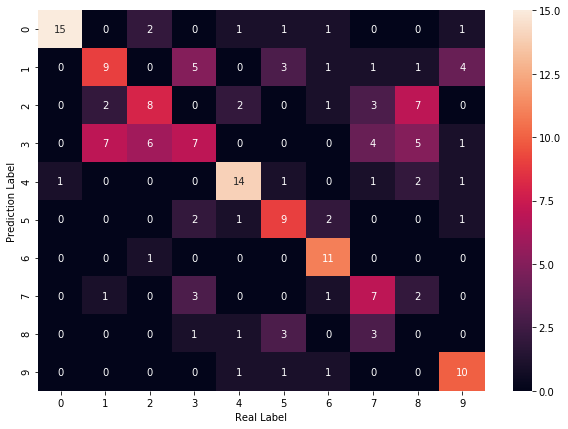

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[1] real:5
#1 min_error:0 index:[3] real:2
#2 min_error:0 index:[1] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:0 index:[3] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:0 index:[8] real:7
#11 min_error:0 index:[4] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[1] real:3
#16 min_error:0 index:[1] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[2] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[4] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:1 index:[4 5 8] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[5] real:6
#29 min_error:1 index:[0 3 6 9] real:9
#30 min_er

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.6066790352504638
Avg Base Learner:0.866573902288188


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1
Accuracy on training set: 0.13333333333333333
Accuracy on training set: 0.24444444444444444
Accuracy on training set: 0.38333333333333336


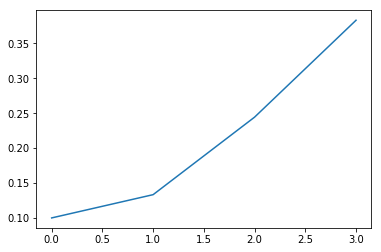

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.1, 0.13333333333333333, 0.24444444444444444, 0.38333333333333336]